## Sınıflandırma Problemleri

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from warnings import filterwarnings
filterwarnings('ignore')

## Lojistik Regresyon

### Model

In [2]:
diabets = pd.read_csv('diabetes.csv')
df = diabets.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [6]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

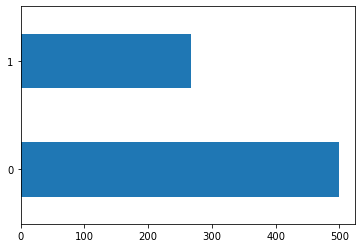

In [7]:
df["Outcome"].value_counts().plot.barh();

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [6]:
#statsmodels

In [7]:
loj = sm.Logit(y, X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Tue, 29 Mar 2022   Pseudo R-squ.:                 0.05922
Time:                        19:54:50   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [8]:
#scit-learn

In [9]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X, y)
loj_model

LogisticRegression(solver='liblinear')

In [8]:
loj_model.intercept_ #sabit değeri almış olduk

array([-5.88679617])

In [15]:
loj_model.coef_ #bütün bağımsız değişkenlerin kat sayı değerlerini alma işlemi

array([[ 1.16994476e-01,  2.83733435e-02, -1.68981359e-02,
         7.55145090e-04, -6.41407258e-04,  5.97201268e-02,
         6.76128123e-01,  7.23498971e-03]])

### Tahmin & Model Tuning

In [16]:
#lojistik regresyonun diğer algoritmalar gibi model hipermetresi yok
#burda optimize edilebilecek bir parametere olarak değerlendirilecek tek parametre sabit.
# burda model tuning değil doğrulama işlemi yapacağız

In [17]:
y_pred = loj_model.predict(X)

In [18]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [19]:
accuracy_score(y, y_pred)

0.7747395833333334

In [20]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [21]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [22]:
loj_model.predict_proba(X)[0:10][:,0:2]  #olasılık üreten fonksiyon

array([[0.3505852 , 0.6494148 ],
       [0.91692518, 0.08307482],
       [0.22489628, 0.77510372],
       [0.92127453, 0.07872547],
       [0.16759435, 0.83240565],
       [0.79886109, 0.20113891],
       [0.8800353 , 0.1199647 ],
       [0.27795677, 0.72204323],
       [0.32053464, 0.67946536],
       [0.92264521, 0.07735479]])

In [23]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [24]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:, 1]

In [25]:
y_probs[0:10]

array([0.6494148 , 0.08307482, 0.77510372, 0.07872547, 0.83240565,
       0.20113891, 0.1199647 , 0.72204323, 0.67946536, 0.07735479])

In [26]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [27]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [28]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [29]:
accuracy_score(y, y_pred)

0.7747395833333334

In [30]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [31]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.6494148 , 0.08307482, 0.77510372, 0.07872547, 0.83240565])

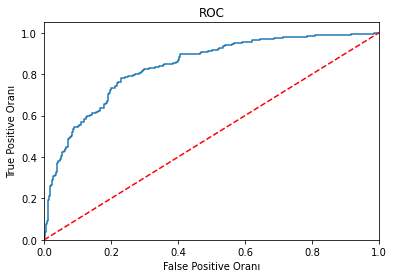

In [32]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.30,
                                                   random_state = 42)


In [34]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(solver='liblinear')

In [35]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7532467532467533

In [36]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.7704710144927536

## Gaussian Naive Bayes

In [10]:
df = diabets.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1 )
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.30,
                                                   random_state = 42)


In [11]:
from sklearn.naive_bayes import GaussianNB

In [39]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model


GaussianNB()

In [40]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [41]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [42]:
y_pred = nb_model.predict(X_test)

In [43]:
accuracy_score(y_test, y_pred) #test hatamızı oluşturmuş olduk

0.7445887445887446

In [44]:
#bu test hatamızın doğrulanmışını elde etmek istersek

In [45]:
cross_val_score(nb_model, X_test, y_test, cv=10).mean()

0.775

## KNN

### Model & Tahmin

In [46]:
df = diabets.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1 )
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.30,
                                                   random_state = 42)


In [47]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [48]:
y_pred = knn_model.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred) #bu bizim ilkel skorumuz

0.6883116883116883

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



### Model Tuning

In [51]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [52]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [53]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler:" + str(knn_cv.best_params_))

En iyi skor:0.748637316561845
En iyi parametreler:{'n_neighbors': 11}


In [54]:
knn = KNeighborsClassifier(11)
knn_tuned = knn_cv.fit(X_train, y_train)

In [55]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [56]:
y_pred = knn_tuned.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred)

0.7316017316017316

## SVC

### Model & Tahmin

In [58]:
df = diabets.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1 )
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.30,
                                                   random_state = 42)


In [59]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [60]:
svm_model

SVC(kernel='linear')

In [61]:
y_pred = svm_model.predict(X_test)

In [62]:
accuracy_score(y_test, y_pred)

0.7445887445887446

### Model Tuning

In [63]:
svc_params = {"C": np.arange(1,10)}


svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc, svc_params,
                            cv=10,
                            n_jobs= -1,
                            verbose=2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [64]:
print("En iyi parametreler:" + str(svc_cv_model.best_params_))

En iyi parametreler:{'C': 5}


In [65]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [66]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

## RBF SVC (doğrusal olmayan destek vektör modeli)

### Model & Tahmin

In [67]:
df = diabets.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1 )
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.30,
                                                   random_state = 42)


In [68]:
svc_model = SVC(kernel = "rbf").fit(X_train,y_train)

In [69]:
dir(svc_model)

['C',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_check_proba',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_intercept_',
 '_more_tags',
 '_n_support',
 '_pairwise',
 '_predict_log_proba',
 '_predict_proba',
 '_probA',
 '_probB',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sparse',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predi

In [70]:
svc_model

SVC()

In [71]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

### Model Tuning

In [72]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]}

In [74]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params,
                         cv=10,
                         n_jobs=-1,
                         verbose=2)
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [75]:
print("En iyi parametreler:" + str(svc_cv_model.best_params_))

En iyi parametreler:{'C': 10, 'gamma': 0.0001}


In [78]:
svc_tuned = SVC(C = 10, gamma =0.0001).fit(X_train, y_train)

In [79]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Yapay Sinir Ağları

## Model & Tahmin

In [11]:
df = diabets.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1 )
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.30,
                                                   random_state = 42)


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [20]:
from sklearn.neural_network import MLPClassifier

In [23]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [24]:
mlpc.coefs_

[array([[-4.23141164e-01, -1.80175151e-01,  1.22295660e-01,
         -2.43473891e-01,  8.68670808e-03, -4.87485000e-02,
          1.70815849e-01, -3.53671831e-01,  6.72216876e-02,
         -1.30546445e-01,  1.14211102e-01,  3.04780819e-01,
          9.51032505e-02, -1.78691370e-01,  8.13014178e-02,
         -3.52391051e-02,  4.06067313e-02, -3.49175337e-01,
          1.56176012e-01,  1.87421692e-01,  2.17519883e-01,
         -1.08215919e-01,  6.14611918e-02,  1.21551786e-01,
         -1.68629393e-01, -1.46831308e-01, -2.00910583e-01,
         -2.45305825e-01, -2.23751332e-03, -2.20295543e-01,
         -4.12229147e-02, -5.64787705e-02, -3.79403653e-01,
          4.14948260e-02, -3.33044757e-01, -1.87963810e-01,
          3.99680176e-03, -2.34655807e-01,  1.28090795e-01,
         -2.69466470e-01,  4.16309784e-02, -5.06647191e-02,
         -2.06034381e-01,  2.19457364e-01, -4.98522895e-01,
         -1.30219010e-01,  2.08215820e-01,  5.12135784e-02,
          2.41177204e-04,  8.86106771e-0

In [25]:
dir(mlpc)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_check_n_features',
 '_compute_loss_grad',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_forward_pass_fast',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_label_binarizer',
 '_loss_grad_lbfgs',
 '_more_tags',
 '_no_improvement_count',
 '_optimizer',
 '_partial_fit',
 '_random_state',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_unpack',
 '_update_no_improvement_count',
 '_validate_data',
 '_validate_hyperparameters',
 '_validate_input',
 'activation',
 'alpha

In [26]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7359307359307359

### Model Tuning

In [28]:
?mlpc

Type:        MLPClassifier
String form: MLPClassifier()
File:        c:\users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, default='

In [29]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001, 0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                    (100,100,100),
                                    (100,100),
                                    (3,5),
                                    (5,3)],
              "solver": ["lbfgs", "adam", "sgd"],
              "activation": ["relu", "logistic"]}


In [31]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params,
                            cv=10,
                            n_jobs=-1,
                            verbose=2)
mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [32]:
print("En iyi parametreler :" + str(mlpc_cv_model.best_params_))

En iyi parametreler :{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'solver': 'sgd'}


In [33]:
mlpc_tuned = MLPClassifier(activation = "relu",
                          alpha = 0.01,
                          hidden_layer_sizes = (100,100),
                          solver = "sgd")

In [34]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, 100), solver='sgd')

In [35]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7575757575757576

## CART

### Model & Tahmin

In [24]:
df = diabets.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1 )
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.30,
                                                   random_state = 42)


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [33]:
cart_model

DecisionTreeClassifier()

In [34]:
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((1 if x[1] <= 123.0 else 0) if x[2] <= 65.0 else 0) if
    x[2] <= 72.0 else 1) if x[4] <= 9.0 else (0 if x[6] <= 
    0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else 0) if x[0] <=
    4.5 else 1 if x[7] <= 26.5 else 0) if x[5] <= 49.10000038146973 else 1) if
    x[1] <= 127.5 else 1 if x[2] <= 56.0 else (0 if x[7] <= 27.5 else 0 if 
    x[3] <= 14.5 else 1) if x[5] <= 30.300000190734863 else 1 if x[5] <= 
    32.000000953674316 else ((0 if x[5] <= 33.75 else 1) if x[0] <= 0.5 else
    1 if x[5] <= 32.45000076293945 else 0) if x[2] <= 85.0 else 1) if x[7] <=
    28.5 else (1 if x[7] <= 29.5 else (0 if x[1] <= 133.0 else (1 if x[2] <=
    74.0 else 0) if x[0] <= 4.5 else 0) if x[2] <= 94.0 else 1 if x[5] <= 
    12.0 else 0) if x[5] <= 26.949999809265137 else (1 if x[1] <= 28.5 else
    0 if x[0] <= 9

In [35]:
x = [9]

In [36]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [37]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6926406926406926

### Model Tuning

In [38]:
cart_model

DecisionTreeClassifier()

In [39]:
?cart_model

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier()
File:        c:\users\lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

    - If int

In [40]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split": list(range(2,50))}

In [43]:
cart = tree.DecisionTreeClassifier()

cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [44]:
print("En iyi parametreler :" + str(cart_cv_model.best_params_))

En iyi parametreler :{'max_depth': 5, 'min_samples_split': 19}


In [46]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

In [47]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

## Random Forests

### Model & Tahmin

In [12]:
df = diabets.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1 )
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.30,
                                                   random_state = 42)


In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [15]:
rf_model

RandomForestClassifier()

In [16]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

### Model Tuning

In [17]:
rf_model

RandomForestClassifier()

In [18]:
?rf_model

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        c:\users\lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" f

In [19]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [100,500,1000],
            "min_samples_split": [2,5,10]}

In [20]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model,
                          rf_params,
                          cv=10,
                          n_jobs=-1,
                          verbose=2)

In [21]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

In [22]:
print("En iyi parametreler :" + str(rf_cv_model.best_params_))

En iyi parametreler :{'max_depth': 10, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [23]:
#final

In [26]:
rf_tuned = RandomForestClassifier(max_depth = 10,
                                  max_features = 5,
                                  min_samples_split = 10,
                                  n_estimators = 100)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_split=10)

In [28]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

In [29]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

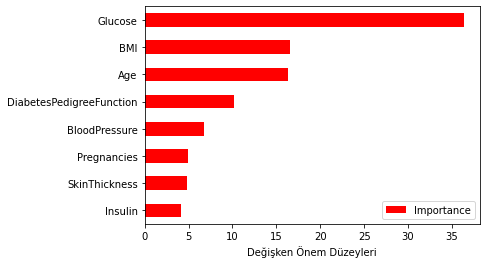

In [31]:
Importance.sort_values(by = "Importance",
                      axis = 0,
                      ascending = True).plot(kind ="barh", color="r")
plt.xlabel("Değişken Önem Düzeyleri")

## Gradient Boosting Machines

In [32]:
df = diabets.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1 )
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.30,
                                                   random_state = 42)


In [34]:
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [36]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

### Model Tuning

In [38]:
?gbm_model

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
Length:      100
File:        c:\users\lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'deviance', 'exponential'}, default='deviance'
    The loss function to be optimized. 'deviance' refers to
    deviance (= logistic regression) for classification
    with probabilistic outputs. For loss 'exponential' gradient
    boosting recovers the AdaBoost algorithm.

learning_rate : float, default=0.1
    Learning 

In [39]:
gbm_params = {"learning_rate": [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100, 500, 1000],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [40]:
gbm = GradientBoostingClassifier()
gbm_cv = GridSearchCV(gbm, gbm_params, cv=10, n_jobs=-1, verbose=2)

In [41]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

In [42]:
print("En iyi parametreler :" + str(rf_cv_model.best_params_))

En iyi parametreler :{'max_depth': 10, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [43]:
gbm = GradientBoostingClassifier(max_depth = 10,
                                max_features= 5,
                                min_samples_split = 10,
                                n_estimators = 100)

In [44]:
gbm_tuned = gbm.fit(X_train, y_train)

In [45]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7186147186147186

## XGBoost 

### Model Tahmin

In [14]:
df = diabets.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1 )
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.30,
                                                   random_state = 42)


In [15]:
from xgboost import XGBClassifier

In [16]:
xgb_model = XGBClassifier().fit(X_train, y_train)

[20:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [17]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

### Model Tuning

In [18]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_byno <...> _weight=1, subsample=1,
           tree_method='exact', validate_parameters=1, verbosity=None)
File:        c:\users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.
    use_label_encoder : bool
        (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new
        code, we recommend that you set this parameter to False.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    verbosity : Optional[int]
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : typing.Union[str, typing.Callable[[numpy.ndarray, numpy.ndarr

In [20]:
xgb_params = {
    'n_estimators': [100,500,1000,2000],
    'subsample': [0.6,0.8,1.0],
    'max_depth': [3,4,5,6],
    'learning_rate': [0.1,0.01,0.02,0.05],
    'min_samples_split': [2,5,10]
}

In [21]:
xgb = XGBClassifier()
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2)

In [22]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[21:13:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:13:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [23]:
xgb_cv_model.best_params_

{'learning_rate': 0.02,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.6}

In [24]:
xgb = XGBClassifier(learning_rate = 0.02,
                    max_depth = 3,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.6
                   )

In [25]:
xgb_tuned = xgb.fit(X_train, y_train)

[22:38:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:38:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [26]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

## LightGBM

### Model & Tahmin

In [4]:
df = diabets.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1 )
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.30,
                                                   random_state = 42)


In [5]:
from lightgbm import LGBMClassifier

In [6]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [7]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

### Model Tuning

In [8]:
lgbm_model

LGBMClassifier()

In [9]:
?lgbm_model

Type:           LGBMClassifier
String form:    LGBMClassifier()
File:           c:\users\lenovo\anaconda3\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : str, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``learning_rate`` argument in training.
n_estimators : int, optional (de

In [10]:
lgbm_params = {
    'n_estimators': [100,500,1000,2000],
    'subsample': [0.6,0.8,1.0],
    'max_depth': [3,4,5,6],
    'learning_rate': [0.1,0.01,0.02,0.05],
    'min_child_samples': [5,10,20]
}

In [11]:
lgbm = LGBMClassifier()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_params,
                             cv=10,
                             n_jobs=-1,
                             verbose=2)

In [12]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [13]:
lgbm_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_samples': 20,
 'n_estimators': 100,
 'subsample': 0.6}

In [15]:
lgbm = LGBMClassifier(learning_rate = 0.05,
                     max_depth = 3,
                     subsample = 0.6,
                     n_estimators = 100,
                     min_child_samples = 20)

In [16]:
lgbm_tuned = lgbm.fit(X_train, y_train)

In [17]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

## CatBoost

### Model & Tahmin

In [18]:
df = diabets.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1 )
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.30,
                                                   random_state = 42)


In [19]:
from catboost import CatBoostClassifier

In [20]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.0079
0:	learn: 0.6879744	total: 438ms	remaining: 7m 17s
1:	learn: 0.6843414	total: 442ms	remaining: 3m 40s
2:	learn: 0.6805760	total: 446ms	remaining: 2m 28s
3:	learn: 0.6765782	total: 449ms	remaining: 1m 51s
4:	learn: 0.6720829	total: 453ms	remaining: 1m 30s
5:	learn: 0.6681617	total: 457ms	remaining: 1m 15s
6:	learn: 0.6641912	total: 460ms	remaining: 1m 5s
7:	learn: 0.6602881	total: 463ms	remaining: 57.4s
8:	learn: 0.6562626	total: 465ms	remaining: 51.2s
9:	learn: 0.6528483	total: 467ms	remaining: 46.2s
10:	learn: 0.6487823	total: 469ms	remaining: 42.1s
11:	learn: 0.6454980	total: 471ms	remaining: 38.7s
12:	learn: 0.6418953	total: 472ms	remaining: 35.9s
13:	learn: 0.6374431	total: 474ms	remaining: 33.4s
14:	learn: 0.6339676	total: 476ms	remaining: 31.3s
15:	learn: 0.6304252	total: 478ms	remaining: 29.4s
16:	learn: 0.6266998	total: 480ms	remaining: 27.8s
17:	learn: 0.6237660	total: 482ms	remaining: 26.3s
18:	learn: 0.6204394	total: 484ms	remaining: 25s
19:	learn

In [21]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

### Model Tuning

In [22]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05,0.1],
    'depth': [3,5,8]
}

In [23]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=10, n_jobs=-1, verbose=2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 10 folds for each of 18 candidates, totalling 180 fits
0:	learn: 0.6863312	total: 5.15ms	remaining: 1.02s
1:	learn: 0.6811157	total: 9.2ms	remaining: 910ms
2:	learn: 0.6752970	total: 13.3ms	remaining: 872ms
3:	learn: 0.6697432	total: 17.2ms	remaining: 845ms
4:	learn: 0.6641758	total: 21.9ms	remaining: 854ms
5:	learn: 0.6576656	total: 26ms	remaining: 841ms
6:	learn: 0.6521870	total: 30.1ms	remaining: 830ms
7:	learn: 0.6465564	total: 34.4ms	remaining: 826ms
8:	learn: 0.6407595	total: 38.6ms	remaining: 819ms
9:	learn: 0.6357725	total: 42.9ms	remaining: 815ms
10:	learn: 0.6299942	total: 47.2ms	remaining: 811ms
11:	learn: 0.6240480	total: 51.5ms	remaining: 807ms
12:	learn: 0.6196095	total: 55.6ms	remaining: 800ms
13:	learn: 0.6148715	total: 59.5ms	remaining: 791ms
14:	learn: 0.6092626	total: 63.7ms	remaining: 786ms
15:	learn: 0.6046764	total: 67.9ms	remaining: 780ms
16:	learn: 0.6012725	total: 71.7ms	remaining: 772ms
17:	learn: 0.5958121	total: 75.7ms	remaining: 766ms
18:	learn: 0.5

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [24]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [25]:
catb = CatBoostClassifier(iterations = 200,
                         learning_rate = 0.01,
                         depth = 8)
catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6863312	total: 6.65ms	remaining: 1.32s
1:	learn: 0.6811157	total: 11.9ms	remaining: 1.18s
2:	learn: 0.6752970	total: 20.5ms	remaining: 1.35s
3:	learn: 0.6697432	total: 26.5ms	remaining: 1.3s
4:	learn: 0.6641758	total: 32.3ms	remaining: 1.26s
5:	learn: 0.6576656	total: 36.7ms	remaining: 1.19s
6:	learn: 0.6521870	total: 40.9ms	remaining: 1.13s
7:	learn: 0.6465564	total: 44.7ms	remaining: 1.07s
8:	learn: 0.6407595	total: 49.4ms	remaining: 1.05s
9:	learn: 0.6357725	total: 53.3ms	remaining: 1.01s
10:	learn: 0.6299942	total: 57.3ms	remaining: 984ms
11:	learn: 0.6240480	total: 61.3ms	remaining: 961ms
12:	learn: 0.6196095	total: 66.2ms	remaining: 952ms
13:	learn: 0.6148715	total: 70.3ms	remaining: 934ms
14:	learn: 0.6092626	total: 74.1ms	remaining: 914ms
15:	learn: 0.6046764	total: 78.7ms	remaining: 905ms
16:	learn: 0.6012725	total: 82.7ms	remaining: 891ms
17:	learn: 0.5958121	total: 86.6ms	remaining: 876ms
18:	learn: 0.5903243	total: 90.7ms	remaining: 864ms
19:	learn: 0.5866024	to

In [26]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533